## Pix2Pix
**일반 GAN** : 노이즈 입력을 이미지로 변환  
**cGAN** : 노이즈와 함께 클래스 레이블 등의 조건을 함께 입력  
**Pix2Pix** : 이미지를 입력으로 하여 원하는 다른 형태의 이미지로 변환시킬 수 있는 GAN 모델

#### Image-to-Image Translation with Conditional Adversarial Networks
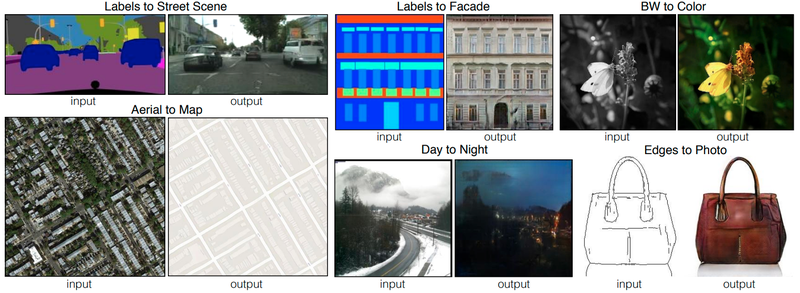  
**Image-to-Image Translation** : 이미지 간 변환  
한 이미지의 픽셀에서 다른 이미지의 픽셀로(pixel to pixel) 변환한다 : Pix2Pix  
GAN 기반의 Image-to-Image Translation 작업에서 가장 기초가 되는 연구  

이미지 변환 목적의 Pix2Pix 모델  
- **Convolution 레이어** 활용 : 이미지를 다루는데 효율적
- **GAN 구조** 기반 : Generator와 Discriminator 두 가지 구성 요소

---
### Pix2Pix (Generator)
Generator는 어떠한 이미지를 입력받아 변환된 이미지를 출력하기 위해 사용  

#### Encoder-Decoder 구조
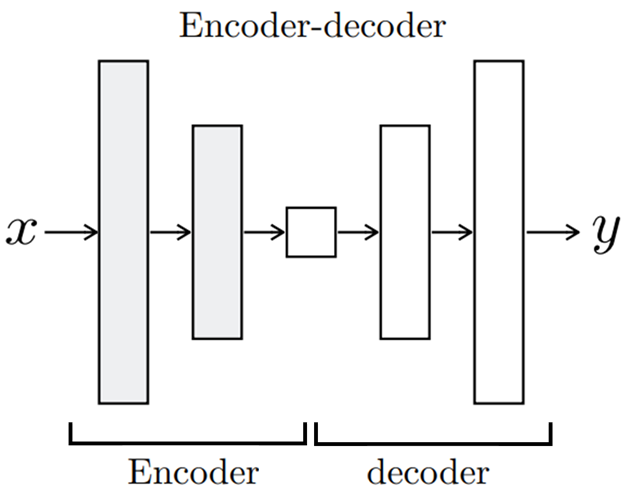  
- **Encoder** : 입력 이미지(x)를 받으면 단계적으로 이미지를 **down-sampling** 하면서 입력 이미지의 중요한 representation을 학습  
- **Decoder** : 이를 이용해 반대로 다시 이미지를 **up-sampling** 하여 입력 **이미지와 동일한 크기** 의 변환된 이미지(y)를 생성

이러한 과정은 모두 **Convolution 레이어** 로 진행된다.  
레이어 내의 수많은 파라미터를 학습하여 잘 변환된 이미지를 얻도록 한다.

**bottleneck**
- Encoder의 최종 출력: 위 그림 중간에 위치한 가장 작은 사각형
- 입력 이미지(x)의 가장 중요한 특징만을 담고 있다.

#### U-Net 구조
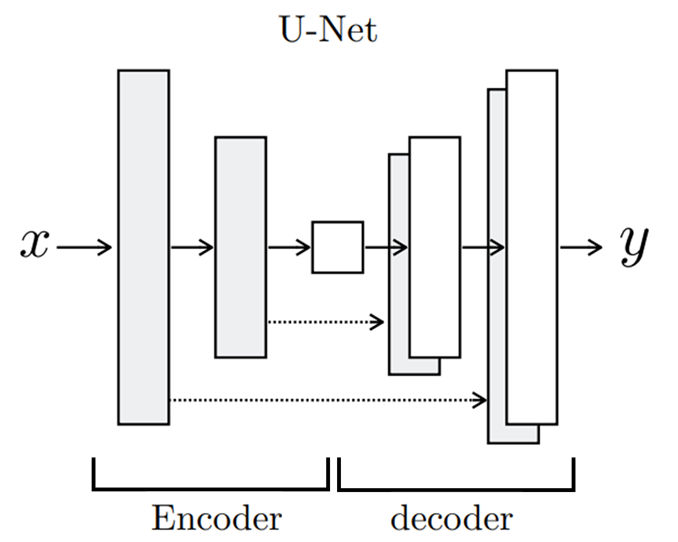  

단순 Encoder-Decoder 구성 Generator와의 차이점
- 각 레이어마다 Encoder와 Decoder가 **연결(skip connection)** 되어 있다
- 입력 이미지와 생성되는 출력 이미지 사이에서 발생하는 정보 손실을 최소화하여 생성된 이미지의 품질 향상
- Decoder가 변환된 이미지를 더 잘 생성하도록 Encoder로부터 더 많은 추가 정보를 이용하는 방법  

단순한 Encoder-Decoder 구조의 Generator를 사용한 결과에 비해 비교적 선명한 결과를 얻을 수 있다.
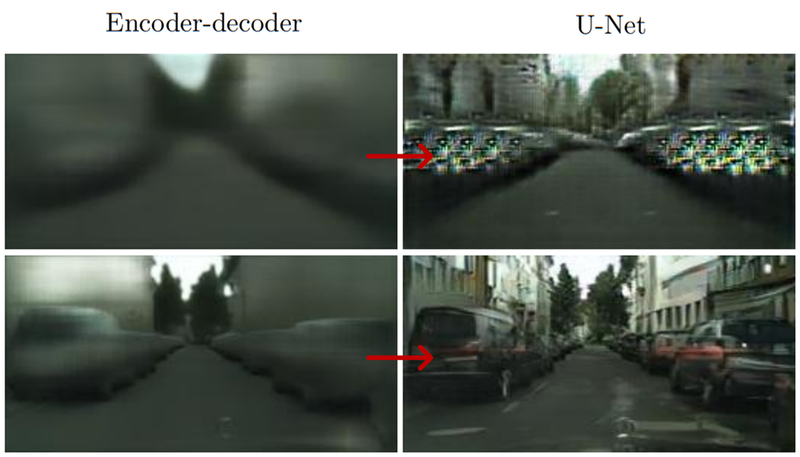  

---
### Pix2Pix (Loss Function)
**Generator**
- 출력된 이미지와 실제 이미지의 차이로 **L2(MSE), L1(MAE)** 같은 손실을 계산한 후 이를 역전파하여 네트워크를 학습  
- 이미지를 Encoder에 입력하여 Decoder의 출력으로 변환된 이미지를 얻을 수 있지만 품질 문제 발생  
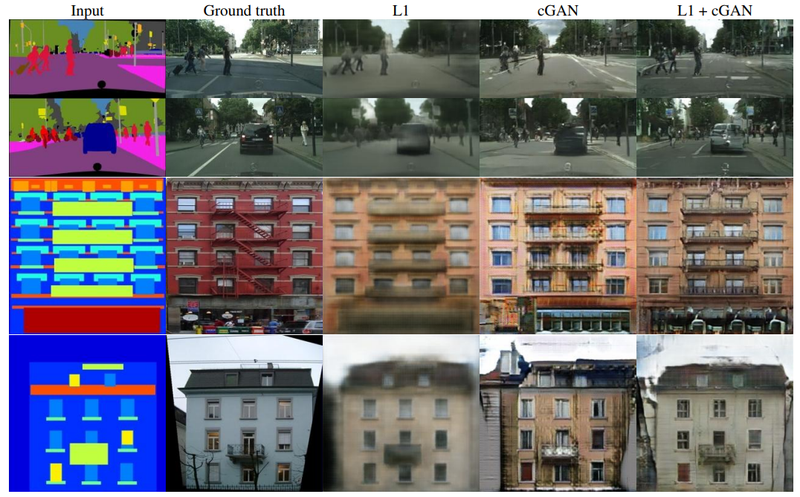  
 이미지를 변환하는데 **L1(MAE)이나 L2(MSE)손실** 만을 이용해서 학습하는 경우  
 Generator가 단순히 이미지의 평균적인 손실만을 줄이고자 파라미터를 학습하기 때문에 결과가 흐릿해지는 현상 발생  
 
 **cGAN** 이라 쓰여진 **GAN 기반의 학습** 방법은   
 Discriminator를 잘 속이려면 Generator가 진짜 같은 이미지를 만들어야 하기 때문에 비교적 훨씬 더 세밀한 정보를 잘 표현함  
 
 **L1손실**과 **GAN 손실**을 같이 사용하면 더욱더 좋은 결과를 얻을 수 있다
 
---
### Pix2Pix (Discriminator)
**DCGAN Discriminator**
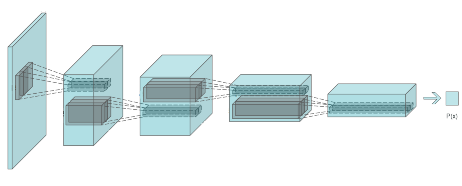  
이미지를 입력받아 convolution 레이어를 이용해 점점 크기를 줄여나가면서, 최종적으로 하나의 이미지에 대해 **하나의 확률 값을 출력**  

하나의 전체 이미지에 대해 하나의 확률 값만을 도출하는 것이 진짜 혹은 가짜를 판별하는 데 좋은 것일까?

**Pix2Pix Discriminator**
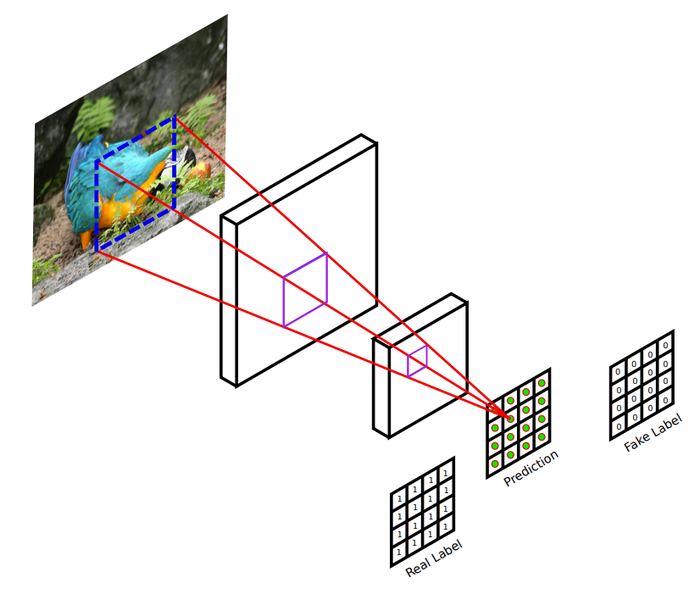 
- 입력 이미지의 파란색 점선 : 여러 개의 출력 중 하나의 출력을 계산하기 위한 입력 이미지의 receptive field 영역  
- 전체 영역을 다 보는 것이 아닌 **일부 영역(파란색 점선)** 에 대해서만 진짜/가짜를 판별하는 하나의 확률 값을 도출  
- 서로 다른 영역에 대해 진짜/가짜를 나타내는 여러 개의 확률 값을 계산 가능
- 이 값을 평균하여 최종 Discriminator의 출력을 생성

하나의 이미지가 Discriminator의 입력으로 들어오면, convolution 레이어를 거쳐 확률 값을 나타내는 최종 결과를 생성  
그 결과는 **하나의 값이 아닌 여러 개의 값** (위 그림의 Prediction은 16개의 값)

이러한 방법은 이미지의 일부 영역(patch)을 이용한다고 하여 **PatchGAN**이라고 한다  

일반적으로 이미지에서 거리가 먼 두 픽셀은 서로 연관성이 거의 없기 때문에 특정 크기를 가진 일부 영역에 대해서 세부적으로 진짜/가짜를 판별하는 것이 Generator로 하여금 더 진짜 같은 이미지를 만들도록 하는 방법이다  

아래 그림은 판별 영역(위 그림의 파란색 점선)을 다양한 크기로 실험하여 그 결과를 보여줍니다.
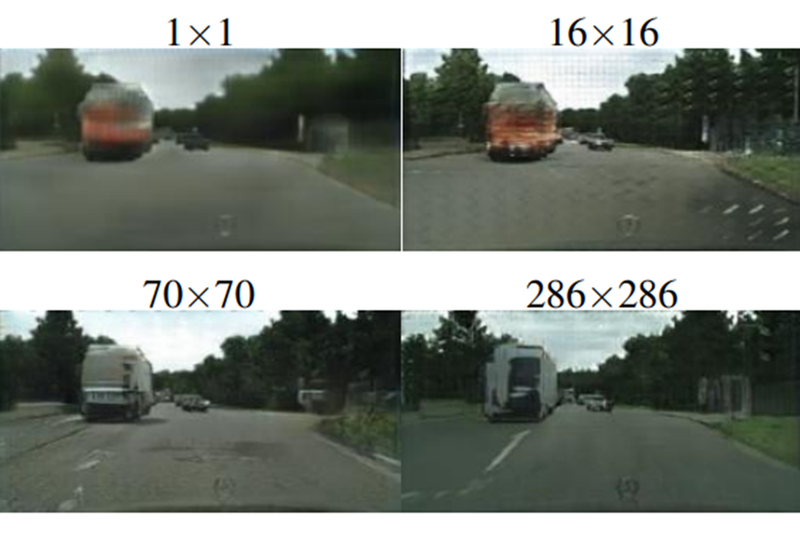  
마지막 286x286 이미지는 **DCGAN Discriminator** 같이 전체 이미지에 대해 하나의 확률 값을 출력하여 진짜/가짜를 판별하도록 학습한 결과(입력 이미지 크기 286x286)  
70x70 이미지는 Discriminator입력 이미지에서 70x70 크기를 갖는 일부 영역에 대해서 하나의 확률 값을 출력한 것  
16x16, 1x1로 갈수록 더 작은 영역을 보고 각각의 확률 값을 계산하므로 Discriminator의 출력값의 개수가 더 많다  

너무 작은 patch를 사용한 결과(1x1, 16x16)는 품질이 좋지 않으며  
70x70 patch를 이용한 결과가 전체 이미지를 사용한 결과(286x286)보다 조금 더 사실적인 이미지를 생성  
하므로 PatchGAN의 사용이 성공적이라고 볼 수 있을 것 같다

---
## 데이터 준비
---


In [1]:
import os

data_path = os.getenv('HOME')+'/aiffel/conditional_generation/data/pokemon_pix2pix_dataset/train/'
print("number of train examples :", len(os.listdir(data_path)))

number of train examples : 830


#### 학습용 데이터셋에서 임의로 6장을 선택하여 시각화

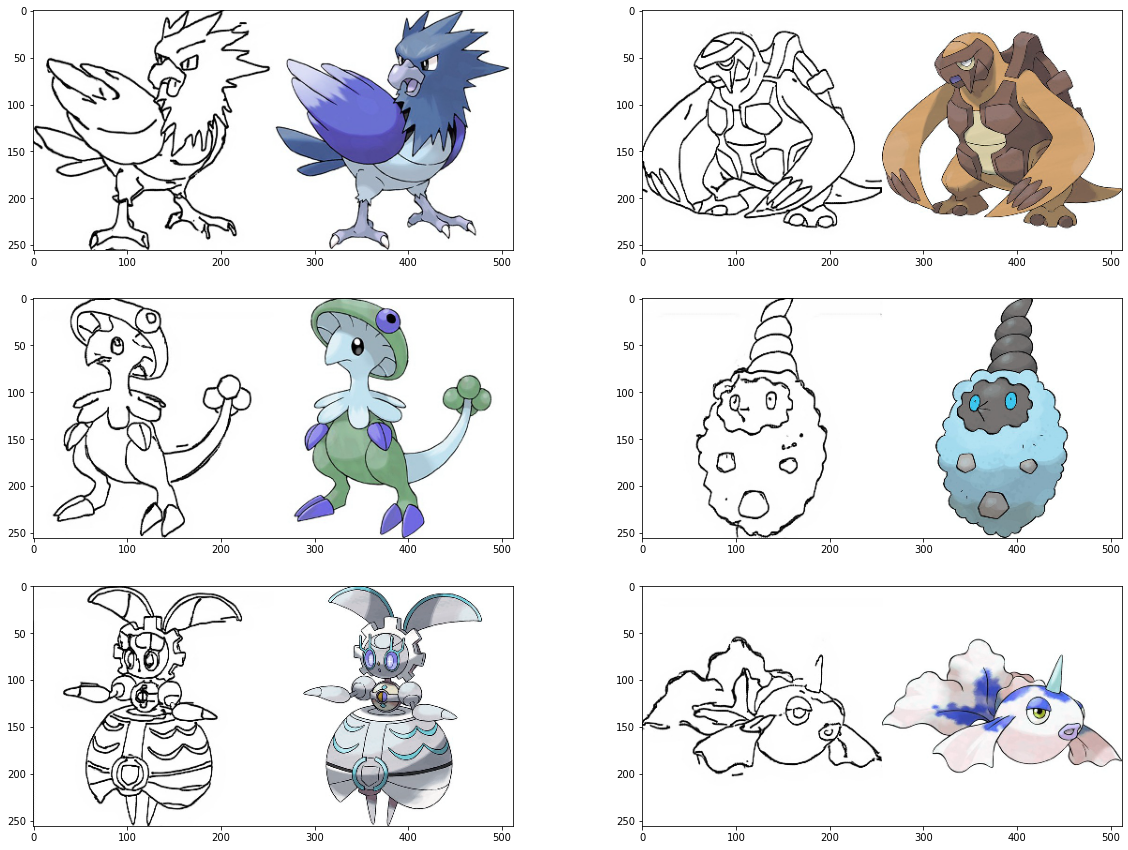

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(20,15))
for i in range(1, 7):
    f = data_path + os.listdir(data_path)[np.random.randint(800)]
    img = cv2.imread(f, cv2.IMREAD_COLOR)
    plt.subplot(3,2,i)
    plt.imshow(img)

In [3]:
# 이미지 shape 확인
f = data_path + os.listdir(data_path)[0]
img = cv2.imread(f, cv2.IMREAD_COLOR)
print(img.shape)

(256, 512, 3)


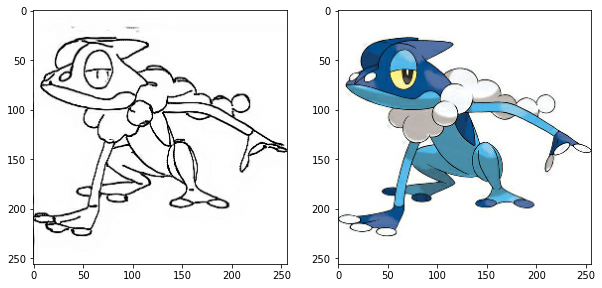

In [4]:
#----------------------------------------------------------------------------
# 모델 학습에 사용할 데이터를 (256, 256, 3) 크기의 2개 이미지로 분할하는 함수
#----------------------------------------------------------------------------
import tensorflow as tf

def normalize(x):
    x = tf.cast(x, tf.float32)
    return (x/127.5) - 1

def denormalize(x):
    x = (x+1)*127.5
    x = x.numpy()
    return x.astype(np.uint8)

def load_img(img_path):
    img = tf.io.read_file(img_path)
    img = tf.image.decode_image(img, 3)
    
    w = tf.shape(img)[1] // 2
    sketch = img[:, :w, :] 
    sketch = tf.cast(sketch, tf.float32)
    colored = img[:, w:, :] 
    colored = tf.cast(colored, tf.float32)
    return normalize(sketch), normalize(colored)
#----------------------------------------------------------------------------

# 테스트
f = data_path + os.listdir(data_path)[1]
sketch, colored = load_img(f)

plt.figure(figsize=(10,7))
plt.subplot(1,2,1); plt.imshow(denormalize(sketch))
plt.subplot(1,2,2); plt.imshow(denormalize(colored))

첫 번째 스케치(Pix2Pix 모델 입력값)로 두 번째 그림과 같은 채색된 이미지를 생성하는 것이 이번 단계의 목표  

#### Augmentation
기존 데이터를 변형, 확장 혹은 재구성하여 데이터셋의 크기를 증가시키는 기법  
- 모델의 일반화 능력을 향상, 과대적합 방지, 데이터의 불균형 문제 해소를 위해 사용
- 상하 혹은 좌우로 뒤집기, 회전, 크롭(Cropping), 확대 및 축소 등의 기법이 있다

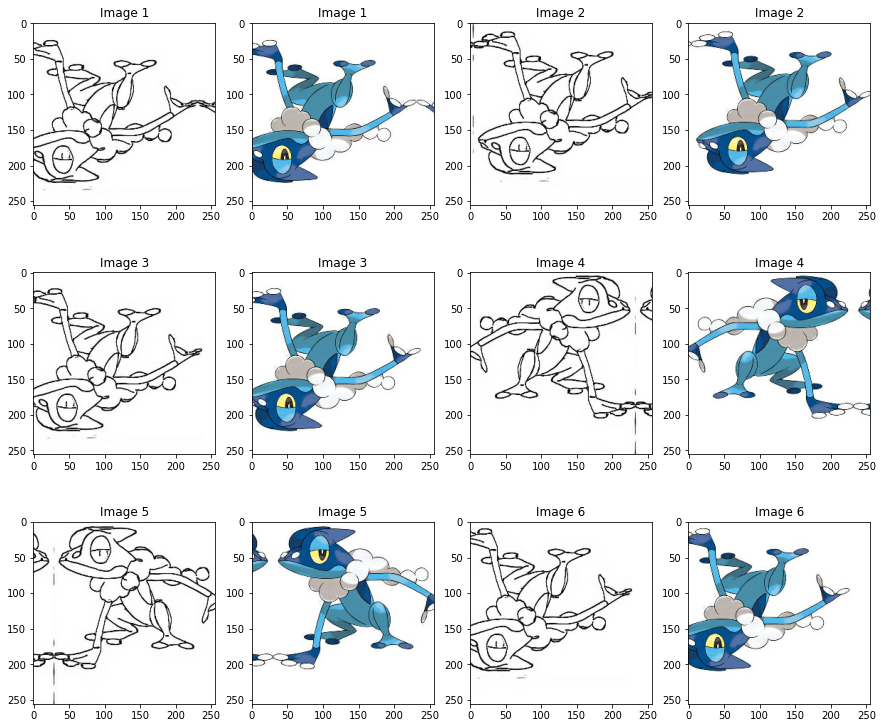

In [6]:
from tensorflow import image
from tensorflow.keras.preprocessing.image import random_rotation

#----------------------------------------------------------------------------------------
# 스케치 및 채색된 2개 이미지를 입력으로 받아 랜덤 연산을 두 이미지에 동일하게 적용
#----------------------------------------------------------------------------------------
@tf.function() # 빠른 텐서플로 연산을 위해 @tf.function()을 사용합니다. 
def apply_augmentation(sketch, colored):
    # 역방향 축으로 이미지(텐서) 결합
    stacked = tf.concat([sketch, colored], axis=-1)
    
    # 랜덤으로 REFLECT 또는 CONSTANT 모드를 지정하여 30픽셀 만큼 패딩
    _pad = tf.constant([[30,30],[30,30],[0,0]])
    if tf.random.uniform(()) < .5:
        padded = tf.pad(stacked, _pad, "REFLECT")
    else:
        padded = tf.pad(stacked, _pad, "CONSTANT", constant_values=1.)

    # 256*256*6 크기로 랜덤으로 자르기
    out = image.random_crop(padded, size=[256, 256, 6])
    # 무작위로 좌우 반전
    out = image.random_flip_left_right(out)
    # 무작위로 상하 반전
    out = image.random_flip_up_down(out)
    # 90도 단위로 무작위 회전
    if tf.random.uniform(()) < .5:
        degree = tf.random.uniform([], minval=1, maxval=4, dtype=tf.int32)
        out = image.rot90(out, k=degree)
    
    return out[...,:3], out[...,3:]   
#----------------------------------------------------------------------------------------

#  테스트
plt.figure(figsize=(15,13))
img_n = 1
for i in range(1, 13, 2):
    augmented_sketch, augmented_colored = apply_augmentation(sketch, colored)
    
    plt.subplot(3,4,i)
    plt.imshow(denormalize(augmented_sketch)); plt.title(f"Image {img_n}")
    plt.subplot(3,4,i+1); 
    plt.imshow(denormalize(augmented_colored)); plt.title(f"Image {img_n}")
    img_n += 1

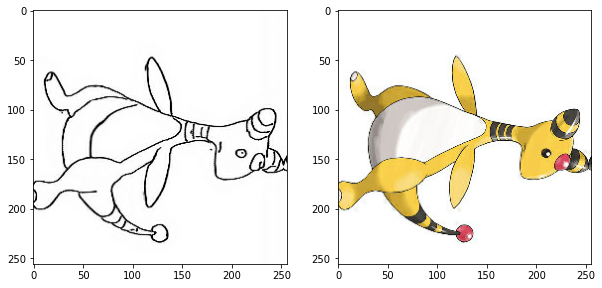

In [8]:
# 학습 데이터에 위 랜덤 변환 함수 적용
from tensorflow import data

def get_train(img_path):
    sketch, colored = load_img(img_path)
    sketch, colored = apply_augmentation(sketch, colored)
    return sketch, colored

train_images = data.Dataset.list_files(data_path + "*.jpg")
train_images = train_images.map(get_train).shuffle(100).batch(4)

# 하나의 이미지 시각화 확인
sample = train_images.take(1)
sample = list(sample.as_numpy_iterator())
sketch, colored = (sample[0][0]+1)*127.5, (sample[0][1]+1)*127.5

plt.figure(figsize=(10,5))
plt.subplot(1,2,1); plt.imshow(sketch[0].astype(np.uint8))
plt.subplot(1,2,2); plt.imshow(colored[0].astype(np.uint8))

---
## Generator 구성하기
---
### Generator의 구성요소
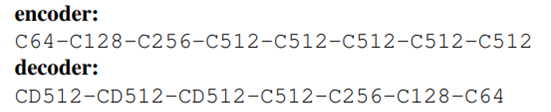  
**C64** : 64개의 4x4 필터에 stride 2를 적용한 Convolution → 0.2 slope의 LeakyReLU  
**CD512** : 512개의 4x4 필터에 stride 2를 적용한 (Transposed) Convolution → BatchNorm → 50% Dropout → ReLU  
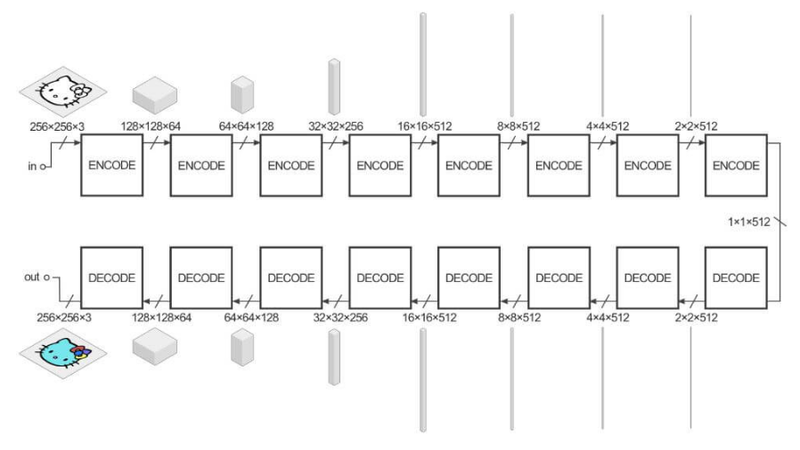  
#### Generator 구현

In [13]:
from tensorflow.keras import layers, Input, Model
#--------------------------------------------------------------------------
# 인코드 블럭 클래스
'''
3개 레이어로 구성된 기본 블록
Convolution → BatchNorm → LeakyReLU 

생성자 Parameters
- n_filters : Convolution 필터 수
- use_bn : BatchNorm 적용 여부 (default: True)
'''
#--------------------------------------------------------------------------
class EncodeBlock(layers.Layer):
    def __init__(self, n_filters, use_bn=True):
        super(EncodeBlock, self).__init__()
        self.use_bn = use_bn
        self.conv = layers.Conv2D(n_filters, 4, 2, "same", use_bias=False) #필터의 크기(=4) 및 stride(=2) 고정
        self.batchnorm = layers.BatchNormalization()
        self.lrelu= layers.LeakyReLU(0.2) #slope coefficient(=0.2) 고정

    def call(self, x):
        x = self.conv(x)
        if self.use_bn:
            x = self.batchnorm(x)
        return self.lrelu(x)
#--------------------------------------------------------------------------
# 인코더 클래스
#--------------------------------------------------------------------------
class Encoder(layers.Layer):
    def __init__(self):
        super(Encoder, self).__init__()
        filters = [64,128,256,512,512,512,512,512]
        self.blocks = [] 
        # for문과 리스트 filter를 활용해서 EncoderBlock을 쌓기
        for f in filters:
            self.blocks.append(EncodeBlock(f, f!=64)) # 첫번째 EncoderBlock의 경우 Batch Normalization을 생략
    
    def call(self, x):
        for block in self.blocks:
            x = block(x)
        return x
    
    def get_summary(self, input_shape=(256,256,3)):
        inputs = Input(input_shape)
        return Model(inputs, self.call(inputs)).summary()
#--------------------------------------------------------------------------
Encoder().get_summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 256, 256, 3)]     0         
_________________________________________________________________
encode_block (EncodeBlock)   (None, 128, 128, 64)      3072      
_________________________________________________________________
encode_block_1 (EncodeBlock) (None, 64, 64, 128)       131584    
_________________________________________________________________
encode_block_2 (EncodeBlock) (None, 32, 32, 256)       525312    
_________________________________________________________________
encode_block_3 (EncodeBlock) (None, 16, 16, 512)       2099200   
_________________________________________________________________
encode_block_4 (EncodeBlock) (None, 8, 8, 512)         4196352   
_________________________________________________________________
encode_block_5 (EncodeBlock) (None, 4, 4, 512)         419635

In [14]:
filters = [512,512,512,512,256,128,64]
for i in range(len(filters)):
    f = filters[i]
    dropout = i < 3
    print(i, f, dropout)

0 512 True
1 512 True
2 512 True
3 512 False
4 256 False
5 128 False
6 64 False


In [15]:
#--------------------------------------------------------------------------
# 디코드 블럭 클래스
'''
4개 레이어로 구성된 기본 블록
(Transposed) Convolution → BatchNorm → 50% Dropout → ReLU 

생성자 Parameters
- f : TransposeConvolution 필터 수
- dropout : Dropout 적용 여부 (default: True)
'''
#--------------------------------------------------------------------------
class DecodeBlock(layers.Layer):
    def __init__(self, f, dropout=True):
        super(DecodeBlock, self).__init__()
        self.dropout = dropout
        self.Transconv = layers.Conv2DTranspose(f, 4, 2, "same", use_bias=False) #필터의 크기(=4) 및 stride(=2) 고정
        self.batchnorm = layers.BatchNormalization()
        self.relu = layers.ReLU()
        
    def call(self, x):
        x = self.Transconv(x)
        x = self.batchnorm(x)
        if self.dropout:
            x = layers.Dropout(.5)(x) #(.5) 50% Dropout
        return self.relu(x)
#--------------------------------------------------------------------------
# 디코더 클래스
#--------------------------------------------------------------------------
class Decoder(layers.Layer):
    def __init__(self):
        super(Decoder, self).__init__()
        filters = [512,512,512,512,256,128,64]
        # for문을 이용해서 모델을 쌓아주세요.
        self.blocks = []
        for i in range(len(filters)):
            self.blocks.append(DecodeBlock(filters[i], i < 3)) # 3번째 block까지만 Dropout을 사용
            
        # Conv2DTranspose
        self.blocks.append(layers.Conv2DTranspose(
            filters=3, # 출력 채널 수
            kernel_size=4, # filter사이즈
            strides=2, # 스트라이드
            padding='same', # 자동 패딩 적용
            use_bias=False # bias 미사용
        ))
        
    def call(self, x):
        for block in self.blocks:
            x = block(x)
        return x
            
    def get_summary(self, input_shape=(1,1,512)):
        inputs = Input(input_shape)
        return Model(inputs, self.call(inputs)).summary()
#--------------------------------------------------------------------------
Decoder().get_summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 1, 1, 512)]       0         
_________________________________________________________________
decode_block (DecodeBlock)   (None, 2, 2, 512)         4196352   
_________________________________________________________________
decode_block_1 (DecodeBlock) (None, 4, 4, 512)         4196352   
_________________________________________________________________
decode_block_2 (DecodeBlock) (None, 8, 8, 512)         4196352   
_________________________________________________________________
decode_block_3 (DecodeBlock) (None, 16, 16, 512)       4196352   
_________________________________________________________________
decode_block_4 (DecodeBlock) (None, 32, 32, 256)       2098176   
_________________________________________________________________
decode_block_5 (DecodeBlock) (None, 64, 64, 128)       5248

In [16]:
#--------------------------------------------------------------------------
# Encoder-Decoder Generator 클래스
#--------------------------------------------------------------------------
class EncoderDecoderGenerator(Model):
    def __init__(self):
        super(EncoderDecoderGenerator, self).__init__()
        self.encoder = Encoder()
        self.decoder = Decoder()
    
    def call(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x
   
    def get_summary(self, input_shape=(256,256,3)):
        inputs = Input(input_shape)
        return Model(inputs, self.call(inputs)).summary()
#--------------------------------------------------------------------------
EncoderDecoderGenerator().get_summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 256, 256, 3)]     0         
_________________________________________________________________
encoder_1 (Encoder)          (None, 1, 1, 512)         19544576  
_________________________________________________________________
decoder_1 (Decoder)          (None, 256, 256, 3)       19542784  
Total params: 39,087,360
Trainable params: 39,076,480
Non-trainable params: 10,880
_________________________________________________________________


---
### Generator 재구성 : U-Net Generator

In [20]:
#--------------------------------------------------------------------------
# U-Net Generator 클래스
#--------------------------------------------------------------------------
class UNetGenerator(Model):
    def __init__(self):
        super(UNetGenerator, self).__init__()
        
        # 인코딩 레이어
        encode_filters = [64,128,256,512,512,512,512,512]        
        self.encode_blocks = []
        for i, f in enumerate(encode_filters):
            self.encode_blocks.append(EncodeBlock(f, i != 0))
            
        # 디코딩 레이어
        decode_filters = [512,512,512,512,256,128,64]
        self.decode_blocks = []
        for i, f in enumerate(decode_filters):
            self.decode_blocks.append(DecodeBlock(f, i < 3))        
        self.last_conv = layers.Conv2DTranspose(3, 4, 2, "same", use_bias=False)
    
    def call(self, x):
        features = []
        for block in self.encode_blocks:
            x = block(x)
            # Encoder와 Decoder 사이의 skip connection을 위해 Encoder 내에서 사용된 각 블록들의 출력 저장
            features.append(x)             
        
        # 마지막 Encoder 출력 삭제
        features = features[:-1]
                    
        for block, feat in zip(self.decode_blocks, features[::-1]):
            x = block(x)
            # Encoder와 Decoder skip connection
            x = layers.Concatenate()([x, feat])
        
        x = self.last_conv(x)
        return x
                
    def get_summary(self, input_shape=(256,256,3)):
        inputs = Input(input_shape)
        return Model(inputs, self.call(inputs)).summary()
#--------------------------------------------------------------------------
UNetGenerator().get_summary()

Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
encode_block_16 (EncodeBlock)   (None, 128, 128, 64) 3072        input_4[0][0]                    
__________________________________________________________________________________________________
encode_block_17 (EncodeBlock)   (None, 64, 64, 128)  131584      encode_block_16[0][0]            
__________________________________________________________________________________________________
encode_block_18 (EncodeBlock)   (None, 32, 32, 256)  525312      encode_block_17[0][0]            
____________________________________________________________________________________________

---
## Discriminator 구성하기
---
### Discriminator의 구성요소
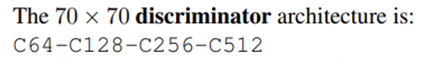  
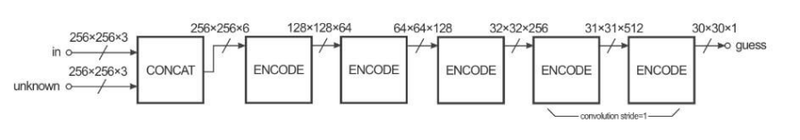  
- 2개 입력(위 그림의 "in", "unknown")을 받아 연결(**CONCAT**)한 후, ENCODE 라고 쓰인 5개의 블록을 통과
- 마지막 블록을 제외한 4개 블록은 위에서 표기된 **C64-C128-C256-C512** 에 해당
- 최종적으로 출력되는 크기는 (30,30,1) : **70x70 PatchGAN** 사용

 
출력 이전의 2개의 ENCODE 블록을 보면 각각의 출력 크기가 32, 31, 30으로 1씩 감소

Generator에서도 사용했던 2 stride convolution에 패딩을 이용하면 (width, height) 크기가 절반씩 감소

1 stride convolution에 패딩을 하지 않는다면 (width, height) 크기는 (필터 크기가 4이므로) 3씩 감소할 텐데, 
그림과 같이 1씩 감소하도록 하려면 무언가 다른 방법을 써야 할 것 같네요.🤔 

이 부분이 지금 이해되지 않는다면 아래 코드에서 다시 다룰 테니 우선 넘어갑시다.


최종 (30,30) 출력에서 각 픽셀의 receptive field 크기를 (70,70)으로 맞추기 위해 Discriminator의 출력 크기를 (30,30) 크기로 강제로 맞추는 과정입니다.

Convolution Layer에서 kernel크기, stride, padding 등을 토대로 출력 크기를 계산했던 방식을 그대로 사용하면 계산할 수 있는데요. 
자세한 계산 과정은 아래 링크를 참고하세요.

#### Discriminator 구현

In [25]:
#--------------------------------------------------------------------------
# Discriminator 기본 블럭 클래스
'''
4개 레이어로 구성된 기본 블록
(Transposed) Convolution → BatchNorm → 50% Dropout → ReLU 

생성자 Parameters
- n_filters : Convolution 필터 수
- stride : Convolution stride
- custom_pad : ZeroPadding2D 적용 여부 (default: False 자동 패딩)
- use_bn : BatchNorm 적용 여부 (default: True)
- act : LeakyReLU 적용 여부 (default: True)
'''
#--------------------------------------------------------------------------
class DiscBlock(layers.Layer):
    def __init__(self, n_filters, stride=2, custom_pad=False, use_bn=True, act=True):
        super(DiscBlock, self).__init__()
        self.custom_pad = custom_pad
        self.use_bn = use_bn
        self.act = act
        
        if custom_pad:
            self.padding = layers.ZeroPadding2D()
            self.conv = layers.Conv2D(n_filters, 4, stride, "valid", use_bias=False)
        else:
            self.conv = layers.Conv2D(n_filters, 4, stride, "same", use_bias=False)
        
        self.batchnorm = layers.BatchNormalization() if use_bn else None
        self.lrelu = layers.LeakyReLU(0.2) if act else None
        
    def call(self, x):
        if self.custom_pad:
            x = self.padding(x)
            x = self.conv(x)
        else:
            x = self.conv(x)
                
        if self.use_bn:
            x = self.batchnorm(x)
            
        if self.act:
            x = self.lrelu(x)
        return x 
#--------------------------------------------------------------------------

In [21]:
# Pix2Pix의 Discriminator가 70x70 PatchGAN
# 최종 출력을 (30,30) 크기로 맞추기 위한 레이어 구성 테스트
inputs = Input((128,128,32))

# ZeroPadding2D:  width 및 height의 양쪽 면에 각각 1씩 패딩되어 총 2만큼 크기가 늘어난다 
out = layers.ZeroPadding2D()(inputs) # 입력(128,128,32) >> 출력(130,130,32)

# Conv2D: 필터 크기 4 및 간격(stride) 1의 convolution 레이어를 통과하면 width 및 height 가 3씩 줄어든다
# OutSize = ( InSize + 2 ∗ PadSize − FilterSize ) / Stride + 1
out = layers.Conv2D(64, 4, 1, "valid", use_bias=False)(out) # 입력(130,130,32) >> 출력(127,127,64)

out = layers.BatchNormalization()(out)
out = layers.LeakyReLU(0.2)(out)

Model(inputs, out).summary()

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 128, 128, 32)]    0         
_________________________________________________________________
zero_padding2d (ZeroPadding2 (None, 130, 130, 32)      0         
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 127, 127, 64)      32768     
_________________________________________________________________
batch_normalization_45 (Batc (None, 127, 127, 64)      256       
_________________________________________________________________
leaky_re_lu_24 (LeakyReLU)   (None, 127, 127, 64)      0         
Total params: 33,024
Trainable params: 32,896
Non-trainable params: 128
_________________________________________________________________


In [26]:
#--------------------------------------------------------------------------
# Discriminator 클래스
#--------------------------------------------------------------------------
class Discriminator(Model):
    def __init__(self):
        super(Discriminator, self).__init__()
        
        filters = [64,128,256,512,1]
        self.concat = layers.Concatenate()
        self.blocks = []
        # For문을 활용해서 DiscBlock을 쌓아주세요.
        # 조건 1 : 3번째까지 stride는 2로 주되 이후에는 1로 주세요
        # 조건 2 : 3번째까지 custom padding을 주지 않아도 되는데 이후에는 주세요.
        # 조건 3: 1번째와 5번째에서는 Batch Normalization을 사용하지 마세요.
        # 조건 4 : 1번째부터 4번째까지 LeakyReLU를 적용하고 마지막에는 sigmoid를 적용하세요. (sigmoid의 경우 따로 정의해야 합니다)
        for i, f in enumerate(filters):
            is_first = i == 0
            is_last = i == (len(filters) - 1)
            stride = 2 if i<3 else 1
            custom_pad = False if i<3 else True
            use_bn = False if (is_first or is_last) else True
            act = not is_last
            self.blocks.append(DiscBlock(f, stride, custom_pad, use_bn, act))
        self.sigmoid = layers.Activation('sigmoid')
        
    def call(self, x, y):
        out = self.concat([x, y])
        for block in self.blocks:
            out = block(out)
        return self.sigmoid(out)
    
    def get_summary(self, x_shape=(256,256,3), y_shape=(256,256,3)):
        x, y = Input(x_shape), Input(y_shape) 
        return Model((x, y), self.call(x, y)).summary()
#--------------------------------------------------------------------------
Discriminator().get_summary()

Model: "model_5"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_6 (InputLayer)            [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
input_7 (InputLayer)            [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
concatenate_10 (Concatenate)    (None, 256, 256, 6)  0           input_6[0][0]                    
                                                                 input_7[0][0]                    
__________________________________________________________________________________________________
disc_block (DiscBlock)          (None, 128, 128, 64) 6144        concatenate_10[0][0]       

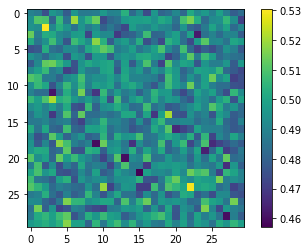

In [27]:
# 임의의 256,256,3 입력시 30,30 출력 테스트
x = tf.random.normal([1,256,256,3])
y = tf.random.uniform([1,256,256,3])

disc_out = Discriminator()(x, y)
plt.imshow(disc_out[0, ... ,0])
plt.colorbar()

---
## 학습 및 테스트
---
### 학습에 필요한 손실 함수 정의

#### Generator 및 Discriminator 손실 함수

In [29]:
from tensorflow.keras import losses

bce = losses.BinaryCrossentropy(from_logits=False)
mae = losses.MeanAbsoluteError()

#-----------------------------------------------------------------
# Generator 손실함수
#-----------------------------------------------------------------
''' 
Parameters
- fake_output : 가짜 이미지
- real_output : 실제 이미지
- fake_disc : Generator가 생성한 가짜 이미지를 Discriminator에 입력하여 얻은 값

Return
- gene_loss : BinaryCrossentropy 
- l1_loss : MeanAbsoluteError 
'''
def get_gene_loss(fake_output, real_output, fake_disc):
    l1_loss = mae(real_output, fake_output)
    gene_loss = bce(tf.ones_like(fake_disc), fake_disc)
    return gene_loss, l1_loss

#-----------------------------------------------------------------
# Discriminator 손실함수
#-----------------------------------------------------------------
'''
Parameters
- fake_disc : 가짜 이미지를 Discriminator에 입력하여 얻은 값
- real_disc : 진짜 이미지를 Discriminator에 입력하여 얻은 값

Return
- fake MeanAbsoluteError + real MeanAbsoluteError
'''
def get_disc_loss(fake_disc, real_disc):
    return bce(tf.zeros_like(fake_disc), fake_disc) + bce(tf.ones_like(real_disc), real_disc)

#-----------------------------------------------------------------


### optimizer 설정

In [30]:
from tensorflow.keras import optimizers

gene_opt = optimizers.Adam(2e-4, beta_1=.5, beta_2=.999)
disc_opt = optimizers.Adam(2e-4, beta_1=.5, beta_2=.999)

### 하나의 배치 크기 데이터 입력시 가중치 1회 업데이트 함수

In [32]:
@tf.function
def train_step(sketch, real_colored):
    with tf.GradientTape() as gene_tape, tf.GradientTape() as disc_tape:
        # Generator
        fake_colored = generator(sketch, training=True)

        # Discriminator
        fake_disc = discriminator(sketch, fake_colored, training=True)
        real_disc = discriminator(sketch, real_colored, training=True)

        # Generator 손실 계산
        gene_loss, l1_loss = get_gene_loss(fake_colored, real_colored, fake_disc)
        gene_total_loss = gene_loss + (100 * l1_loss)

        # Discriminator 손실 계산
        disc_loss = get_disc_loss(fake_disc, real_disc)
    gene_gradient = gene_tape.gradient(gene_total_loss, generator.trainable_variables)
    disc_gradient = disc_tape.gradient(disc_loss, discriminator.trainable_variables)
    
    gene_opt.apply_gradients(zip(gene_gradient, generator.trainable_variables))
    disc_opt.apply_gradients(zip(disc_gradient, discriminator.trainable_variables))
    return gene_loss, l1_loss, disc_loss

### 10 Epoch 학습

In [33]:
EPOCHS = 10

generator = UNetGenerator()
discriminator = Discriminator()

for epoch in range(1, EPOCHS+1):
    for i, (sketch, colored) in enumerate(train_images):
        g_loss, l1_loss, d_loss = train_step(sketch, colored)
                
        # 10회 반복마다 손실을 출력합니다.
        if (i+1) % 10 == 0:
            print(f"EPOCH[{epoch}] - STEP[{i+1}] \
                    \nGenerator_loss:{g_loss.numpy():.4f} \
                    \nL1_loss:{l1_loss.numpy():.4f} \
                    \nDiscriminator_loss:{d_loss.numpy():.4f}", end="\n\n")

EPOCH[1] - STEP[10]                     
Generator_loss:1.0705                     
L1_loss:0.5227                     
Discriminator_loss:1.0673

EPOCH[1] - STEP[20]                     
Generator_loss:1.3663                     
L1_loss:0.3744                     
Discriminator_loss:1.5466

EPOCH[1] - STEP[30]                     
Generator_loss:0.9438                     
L1_loss:0.3027                     
Discriminator_loss:1.1969

EPOCH[1] - STEP[40]                     
Generator_loss:1.1701                     
L1_loss:0.2657                     
Discriminator_loss:0.9561

EPOCH[1] - STEP[50]                     
Generator_loss:1.7274                     
L1_loss:0.2660                     
Discriminator_loss:0.8486

EPOCH[1] - STEP[60]                     
Generator_loss:2.0582                     
L1_loss:0.2795                     
Discriminator_loss:0.8109

EPOCH[1] - STEP[70]                     
Generator_loss:2.2355                     
L1_loss:0.2051                    

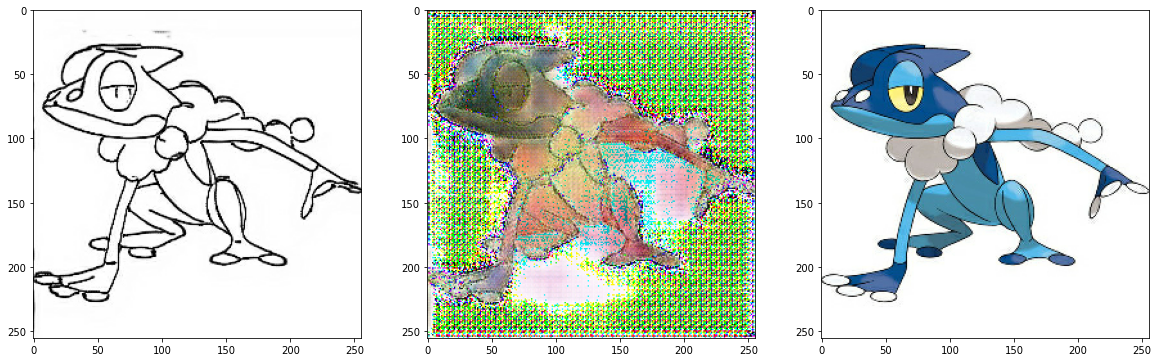

In [34]:
# 시각화 테스트
test_ind = 1

f = data_path + os.listdir(data_path)[test_ind]
sketch, colored = load_img(f)

pred = generator(tf.expand_dims(sketch, 0))
pred = denormalize(pred)

plt.figure(figsize=(20,10))
plt.subplot(1,3,1); plt.imshow(denormalize(sketch))
plt.subplot(1,3,2); plt.imshow(pred[0])
plt.subplot(1,3,3); plt.imshow(denormalize(colored))